In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df_clean = df.dropna()
df_clean.dtypes

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object
dtype: object

In [33]:
df_clean = df_clean.drop(["Name", "Ticket","Cabin"], axis=1)

In [34]:
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
df_clean['Embarked'] = df_clean['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [35]:
df_clean = df_clean.drop(["PassengerId"], axis=1)

lost_percentage = (1 - df_clean.shape[0] *df_clean.shape[1] / df.shape[0] / df.shape[1]) * 100
print(f"Процент потерянных данных: {lost_percentage}%")

df_clean

Процент потерянных данных: 86.30751964085297%


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,3
6,0,1,0,54.0,0,0,51.8625,3
10,1,3,1,4.0,1,1,16.7000,3
11,1,1,1,58.0,0,0,26.5500,3
...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,3
872,0,1,0,33.0,0,0,5.0000,3
879,1,1,1,56.0,0,1,83.1583,1
887,1,1,1,19.0,0,0,30.0000,3


In [36]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(columns=['Survived'])
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [38]:
def train_and_show(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    print("Accuraccy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm)
    plt.title("Heatmap")
    plt.show()

    precisions, recalls, _ = precision_recall_curve(y_test, y_proba[:, 1])
    plt.figure(figsize=(6, 4))
    plt.plot(precisions, recalls, label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.legend()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.grid(True)
    plt.legend()
    plt.show()

Accuraccy:  0.7454545454545455
Recall:  0.8648648648648649
Precision:  0.7804878048780488
F1:  0.8205128205128206


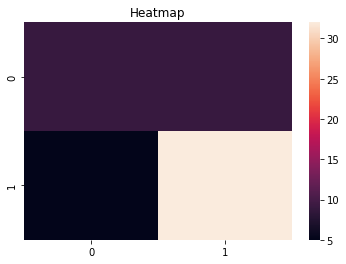

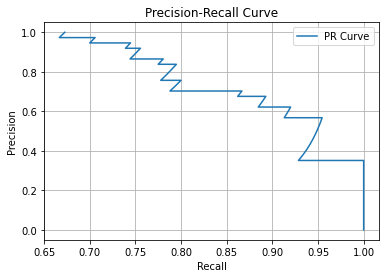

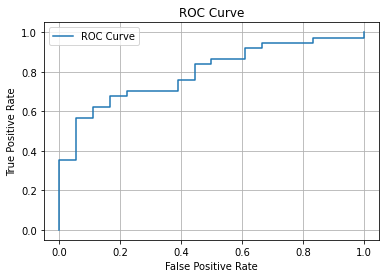

In [39]:
from sklearn.linear_model import LogisticRegression
train_and_show(LogisticRegression(max_iter = 1000, random_state=0))

Модель правильно классифицирует около 74.5%. Recall пропускает около 13.6%. Из всех положительно предсказанных случаев 78% действительно оказываются таковыми. F1 = 82% показывает хорошее среднее между precision и recall. Кривая PR показывает, что с увеличением recall точность падает, особенно при максимальном значении recall = 1. Модель иногда слишком "уверена", что объект положительный, это можно увидеть на тепловой карте. В правом нижнем углу много значений. ROC кривая нормальная. Вывод: модель хорошая.

Accuraccy:  0.6909090909090909
Recall:  0.7567567567567568
Precision:  0.7777777777777778
F1:  0.7671232876712328


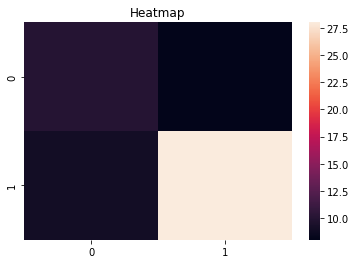

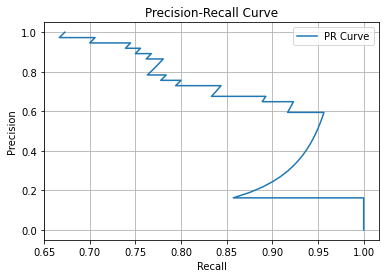

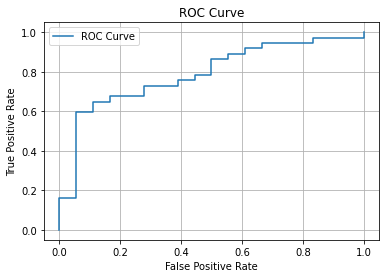

In [40]:
from sklearn.svm import SVC
train_and_show(SVC(kernel='linear', probability=True))

Accuraccy:  0.6727272727272727
Recall:  0.918918918918919
Precision:  0.6938775510204082
F1:  0.7906976744186046


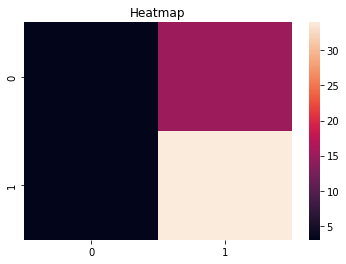

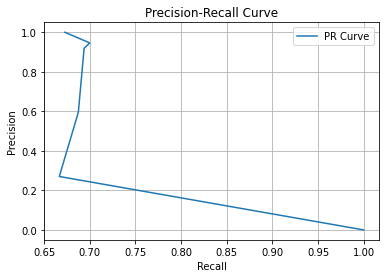

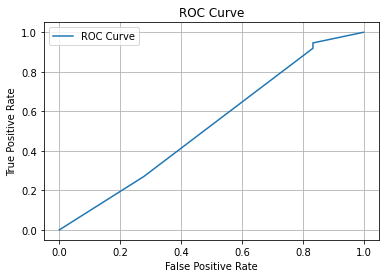

In [41]:
from sklearn.neighbors import KNeighborsClassifier
train_and_show(KNeighborsClassifier())

Логистическая модель оказалась наилучшей. Модель опорных векторов намного хуже предсказывает 0, это видно из тепловой карты. PR кривая менее стабильная. Модель наибольших соседей оказалась наихудшей. Ее ROC кривая показывает, что предсказания модели близки к случайным. Очень высокий recall и маленький precision.